<div style="text-align: center; font-size: 24px; font-weight: bold;">
    Employee Attrition Dataset - Analysis and Insights
</div>

## About Dataset


**Attributes**

1. **Education:** The educational qualifications of employees, including degree, institution, and field of study.

2. **Joining Year:** The year each employee joined the company, indicating their length of service.

3. **City:** The location or city where each employee is based or works.

4. **Payment Tier:** Categorization of employees into different salary tiers.

5. **Age:** The age of each employee, providing demographic insights.

6. **Gender:** Gender identity of employees, promoting diversity analysis.

7. **Ever Benched:** Indicates if an employee has ever been temporarily without assigned work.

8. **Experience in Current Domain:** The number of years of experience employees have in their current field.

**Class**

9. **Leave or Not:** Whether employee left us or Not (1 = Left)


In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv("Employees_data.csv")
df.head(20)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2017,Bangalore,3,34,Male,No,0,0
3,Bachelors,2013,Pune,1,28,Female,No,3,1
4,Bachelors,2014,New Delhi,3,38,Female,No,2,0
5,Masters,2016,Bangalore,3,27,Male,No,5,1
6,Masters,2017,Pune,3,24,Male,Yes,2,1
7,Bachelors,2016,Bangalore,3,22,Male,No,0,0
8,Bachelors,2015,New Delhi,3,38,Male,No,0,0
9,Bachelors,2016,Bangalore,3,34,Female,No,2,1


In [10]:
# Print dataset size
print("Dataset Size:", df.shape)

Dataset Size: (4682, 9)


In [14]:
# class distribution
df.groupby('LeaveOrNot').size()

LeaveOrNot
0    3063
1    1611
?       5
dtype: int64

In [52]:
df.dtypes

Education                    object
JoiningYear                  object
City                         object
PaymentTier                  object
Age                          object
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain    object
LeaveOrNot                   object
dtype: object

## Data cleaning

In [46]:
df.isnull().sum()   # Null values

Education                    2
JoiningYear                  3
City                         1
PaymentTier                  0
Age                          3
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    3
LeaveOrNot                   3
dtype: int64

In [40]:
df.duplicated().sum() #duplicate values

1898

In [22]:
invalid_values = ["--", "?", "n/a"]

# Replace invalid values with NaN
df.replace(invalid_values, np.nan, inplace=True)  
df.dropna(inplace = True)

In [145]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [24]:
df = df.drop_duplicates()   #drop dupplicate values
df.reset_index(drop = True, inplace = True) # resetting index

In [149]:
df.duplicated().sum()

0

In [165]:
df.dtypes

Education                    object
JoiningYear                  object
City                         object
PaymentTier                  object
Age                          object
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain    object
LeaveOrNot                   object
dtype: object

In [26]:
# Convert columns to appropriate data types
df['JoiningYear'] = df['JoiningYear'].astype('int')  
df['PaymentTier'] = df['PaymentTier'].astype('int') 
df['Age'] = df['Age'].astype('int') 
df['ExperienceInCurrentDomain'] = df['ExperienceInCurrentDomain'].astype('int') 
df['LeaveOrNot'] = df['LeaveOrNot'].astype('int')

In [28]:
#chaing data type of class coulumn
df['LeaveOrNot'] = df['LeaveOrNot'].map({1: 'Leave', 0: 'Stay'})
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,Stay
1,Bachelors,2013,Pune,1,28,Female,No,3,Leave
2,Bachelors,2014,New Delhi,3,38,Female,No,2,Stay
3,Masters,2016,Bangalore,3,27,Male,No,5,Leave
4,Masters,2017,Pune,3,24,Male,Yes,2,Leave
...,...,...,...,...,...,...,...,...,...
2759,Masters,2017,Pune,2,31,Female,No,2,Stay
2760,Bachelors,2016,Pune,3,30,Male,No,2,Stay
2761,Masters,2013,Pune,2,37,Male,No,2,Leave
2762,Masters,2018,New Delhi,3,27,Male,No,5,Leave


In [139]:
df.dtypes

Education                    object
JoiningYear                   int32
City                         object
PaymentTier                   int32
Age                           int32
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int32
LeaveOrNot                   object
dtype: object

## Exploratory Data Analysis

### 1. Univariate Analysis

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import express as px


In [12]:
def numeric_plot(df, column, plot_type):
    plt.figure(figsize=(10, 6))
    
    if plot_type == 'boxplot':
        sns.boxplot(data=df, x=column)
        plt.title(f'Boxplot of {column}')
    elif plot_type == 'distplot':
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution Plot of {column}')
    else:
        raise ValueError("Invalid plot_type. Choose 'boxplot' or 'distplot'.")
    
    plt.show()
    

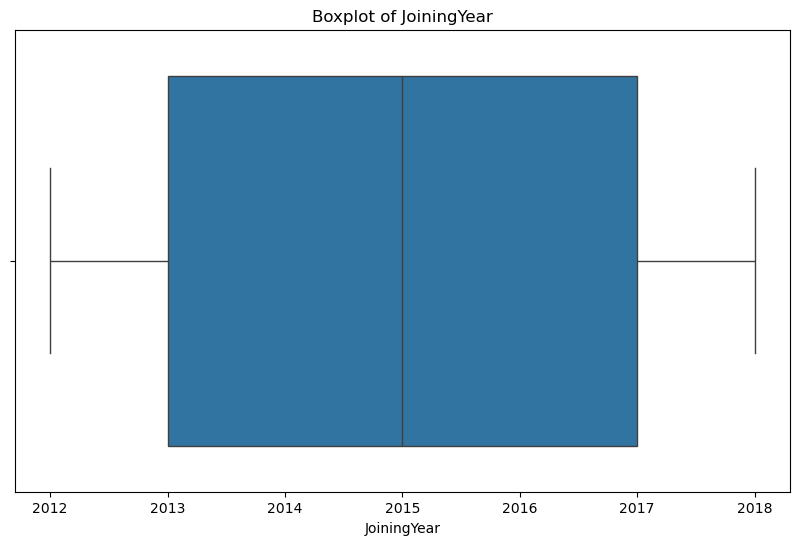

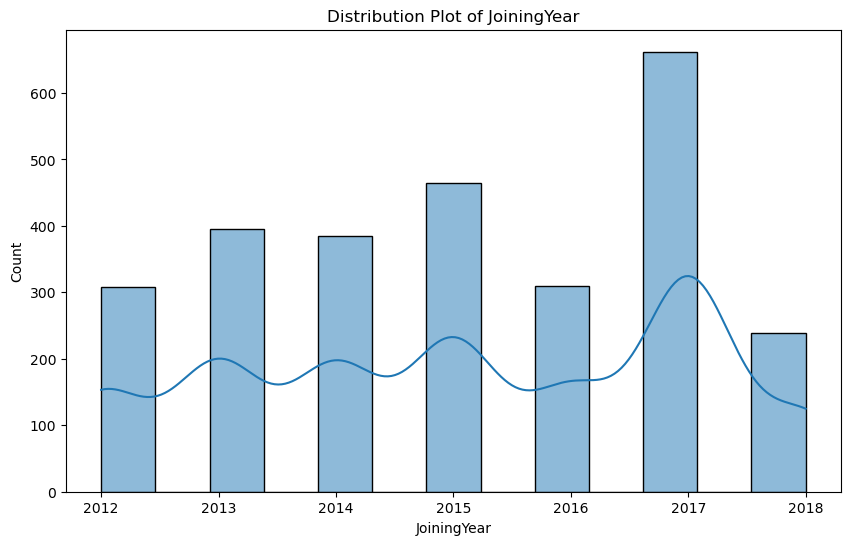

In [151]:
numeric_plot(df,'JoiningYear','boxplot')
numeric_plot(df,'JoiningYear','distplot')

Distribution: This histogram displays counts for each year from 2012 to 2018, with clear fluctuations in the number of joiners each year.
it does not resemble a normal distribution

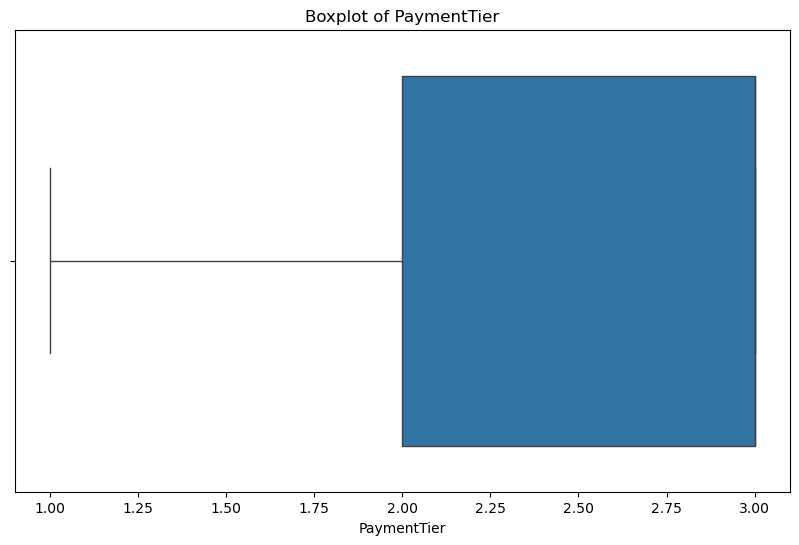

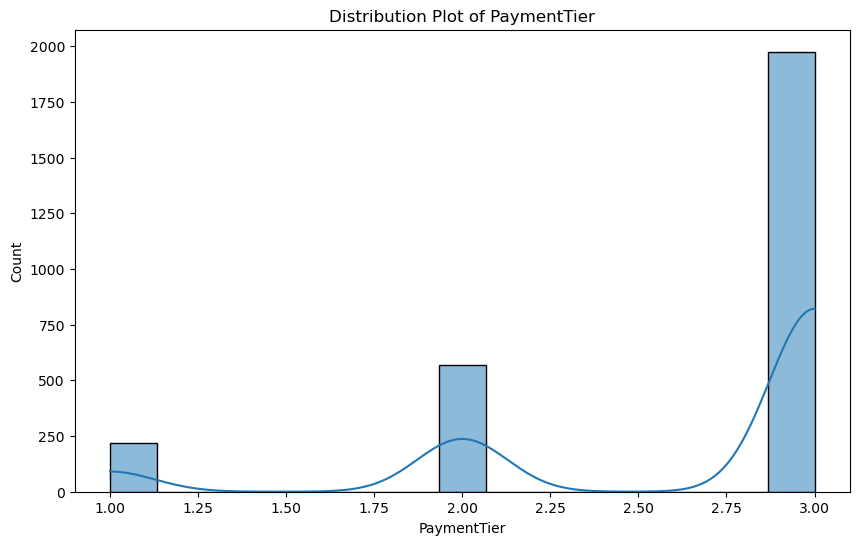

In [153]:
numeric_plot(df,'PaymentTier','boxplot')
numeric_plot(df,'PaymentTier','distplot')

Distribution: The histogram shows distinct bars for each tier, indicating a categorical distribution rather than a continuous one.
Skewness: The distribution is not symmetrical and seems to have a significant peak at the highest payment tier, 
suggesting a skewed distribution towards higher tiers.

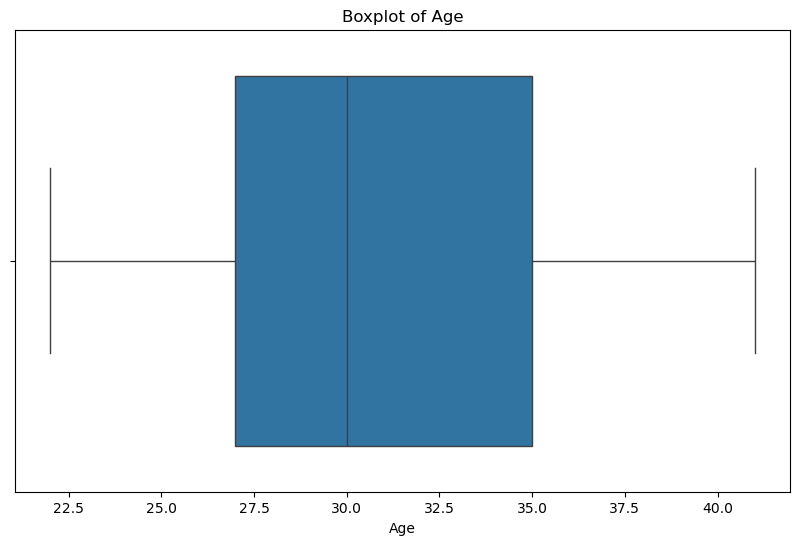

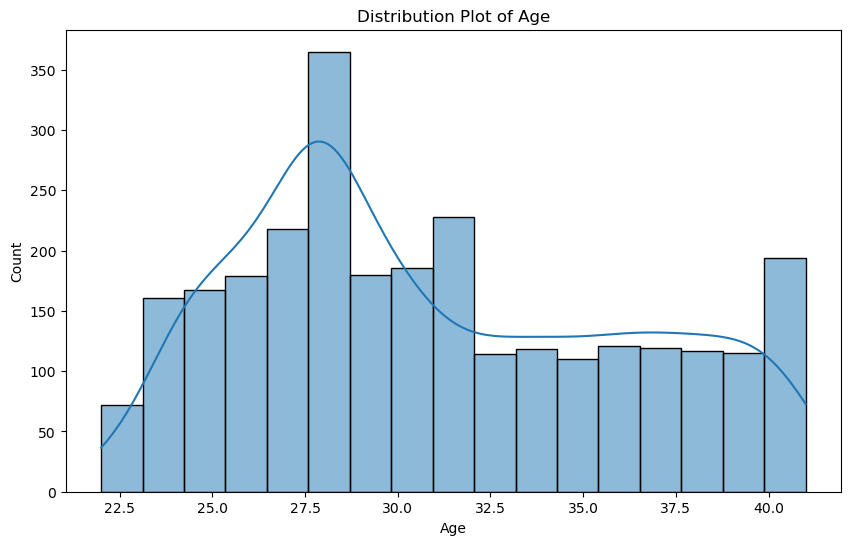

In [155]:
numeric_plot(df,'Age','boxplot')
numeric_plot(df,'Age','distplot')

Distribution: This histogram has a more continuous appearance and resembles a normal distribution but with some irregularities.
Skewness: The distribution appears to be slightly right-skewed because the tail on the right side is longer than on the left.

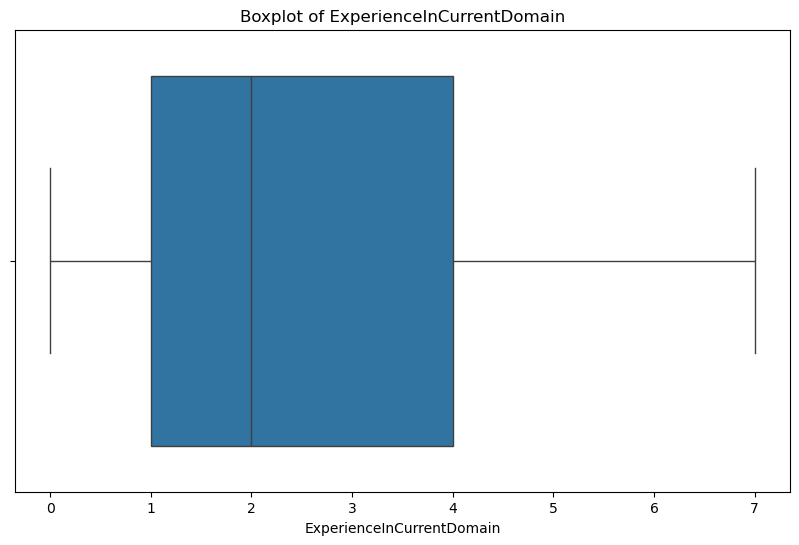

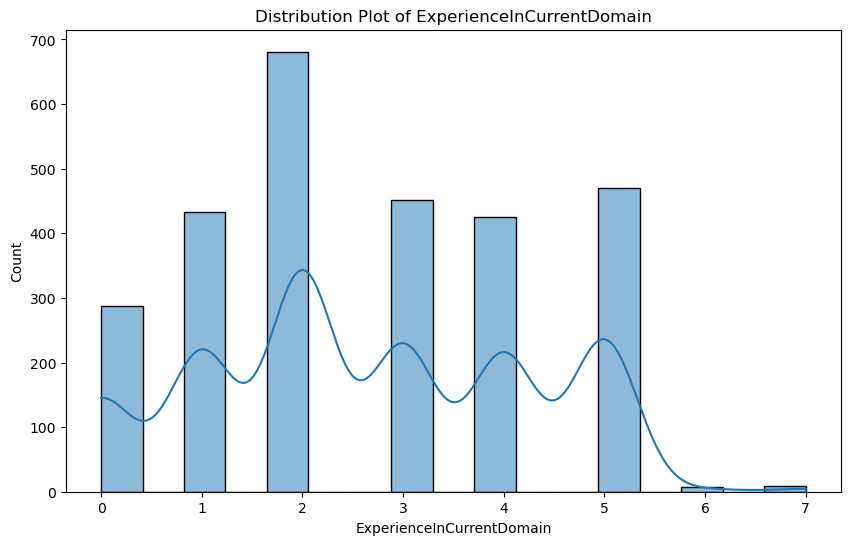

In [157]:
numeric_plot(df,'ExperienceInCurrentDomain','boxplot')
numeric_plot(df,'ExperienceInCurrentDomain','distplot')

Distribution: The histogram shows distinct peaks and gaps, suggesting it is not normally distributed.

**Statistical Test Formality: Shapiro-Wilk Test (Recommended for small datasets, n < 5000)**

In [38]:
from scipy.stats import shapiro

numeric_cols = ['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain']
for col in numeric_cols:
    stat, p = shapiro(df[col].dropna())
    print(f'{col}: W={stat:.3f}, p={p:.3f}')
    if p > 0.05:
        print(f'{col} is likely normally distributed')
    else:
        print(f'{col} is NOT normally distributed\n')

JoiningYear: W=0.919, p=0.000
JoiningYear is NOT normally distributed

PaymentTier: W=0.608, p=0.000
PaymentTier is NOT normally distributed

Age: W=0.943, p=0.000
Age is NOT normally distributed

ExperienceInCurrentDomain: W=0.929, p=0.000
ExperienceInCurrentDomain is NOT normally distributed



In [173]:
def categorical_plot(df, column, plot_type):
    plt.figure(figsize=(10, 6))
    
    if plot_type == 'countplot':
        sns.countplot(data=df, x=column)
        plt.title(f'Count Plot of {column}')
    
    elif plot_type == 'piechart':
        pie_data = df[column].value_counts()
        pie_data.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 8), colors=sns.color_palette("Set3", len(pie_data)))
        plt.title(f'Pie Chart of {column}')
        plt.ylabel('') 
    
    else:
        raise ValueError("Invalid plot_type. Choose 'countplot' or 'barplot'.")
    
    plt.show()

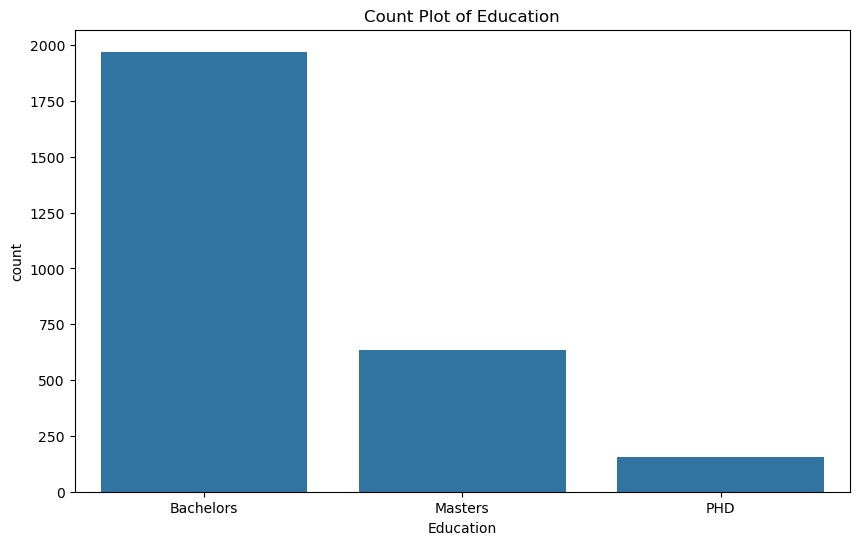

In [175]:
categorical_plot(df,'Education',"countplot")

Distribution:There is a significant count for Bachelors, with a much lower count for both Masters and PhDs.

Skewness: The distribution is heavily skewed to the right, with Bachelors being the overwhelming majority.
This suggests that most individuals in the dataset have a Bachelor's degree.

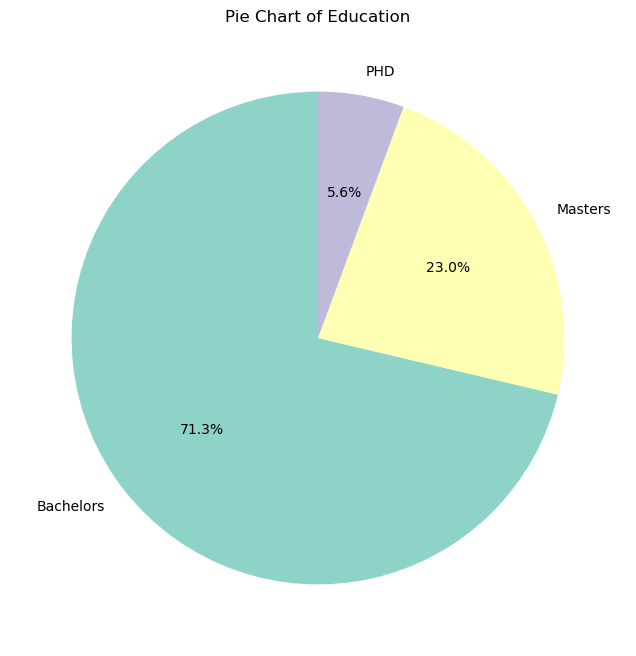

In [177]:
categorical_plot(df,'Education',"piechart")

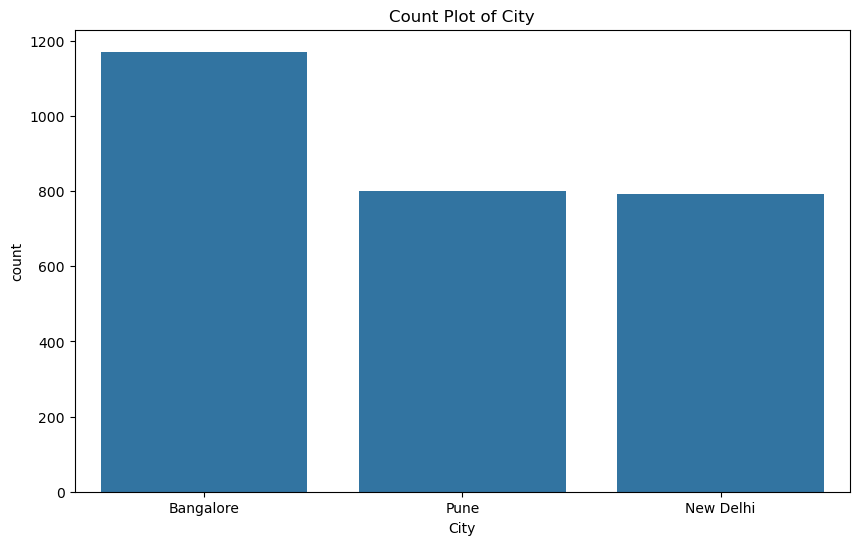

In [181]:
categorical_plot(df,'City',"countplot")

Distribution: Bangalore has the highest count, followed by Pune and New Delhi, which have similar counts.

Skewness: The distribution is somewhat balanced but shows a slight skew towards new delhi, indicating a higher number of individuals
from that city compared to the others.

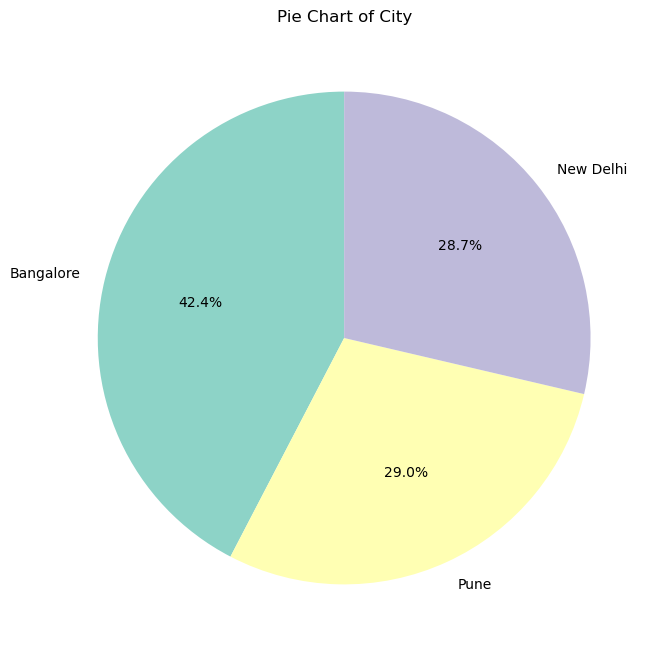

In [183]:
categorical_plot(df,'City',"piechart")

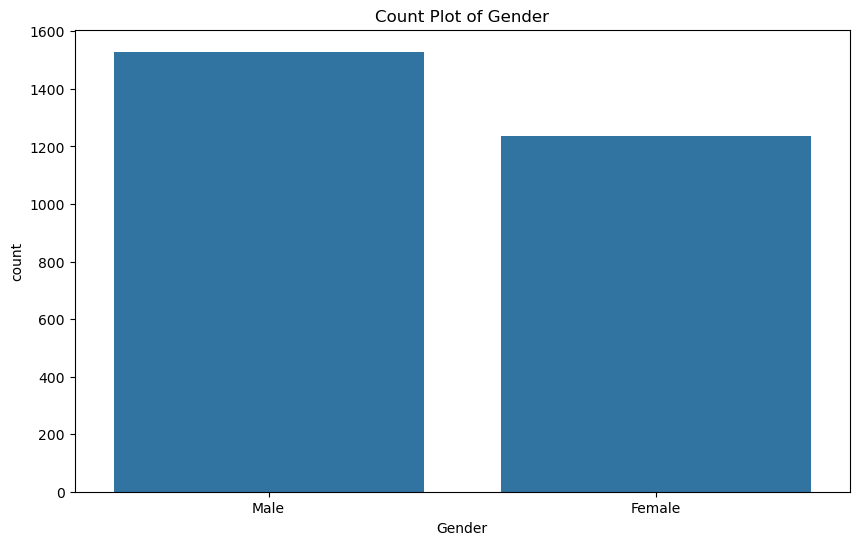

In [185]:
categorical_plot(df,'Gender',"countplot")

Distribution: This plot shows a significant count for Males compared to Females,it does not resemble a normal distribution.

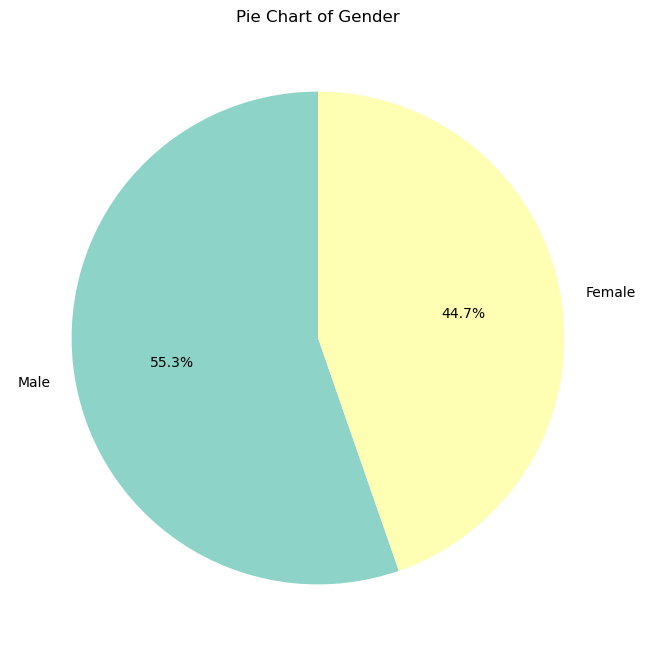

In [187]:
categorical_plot(df,'Gender',"piechart")

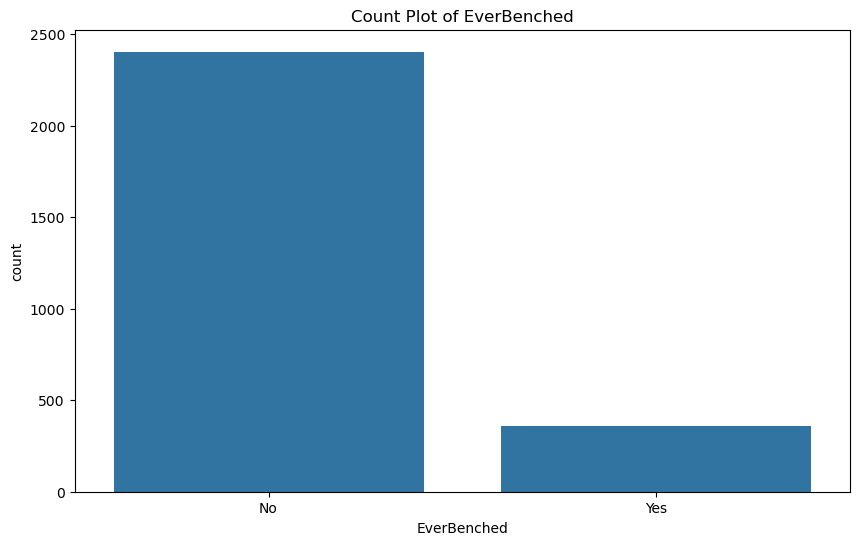

In [189]:
categorical_plot(df,'EverBenched',"countplot")

Distribution: The "No" counts are much higher than the "Yes" counts, leading to an uneven distribution.
 It does not resemble a normal distribution.

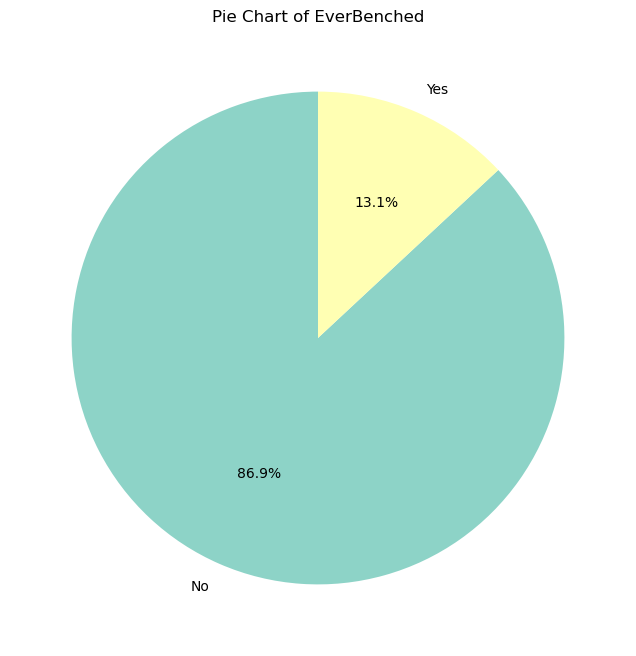

In [191]:
categorical_plot(df,'EverBenched',"piechart")

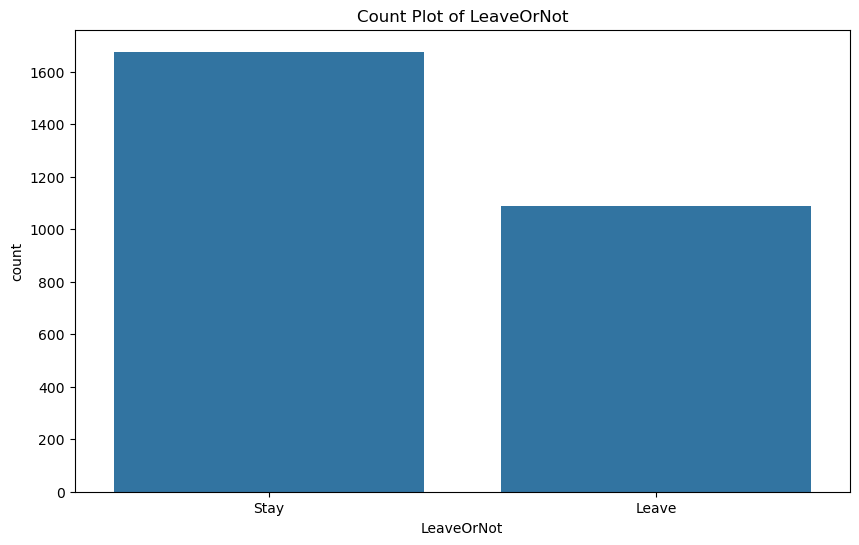

In [193]:
categorical_plot(df,'LeaveOrNot',"countplot")

Distribution:the "Stay" count is much higher than the "Leave" count, indicating an uneven distribution.

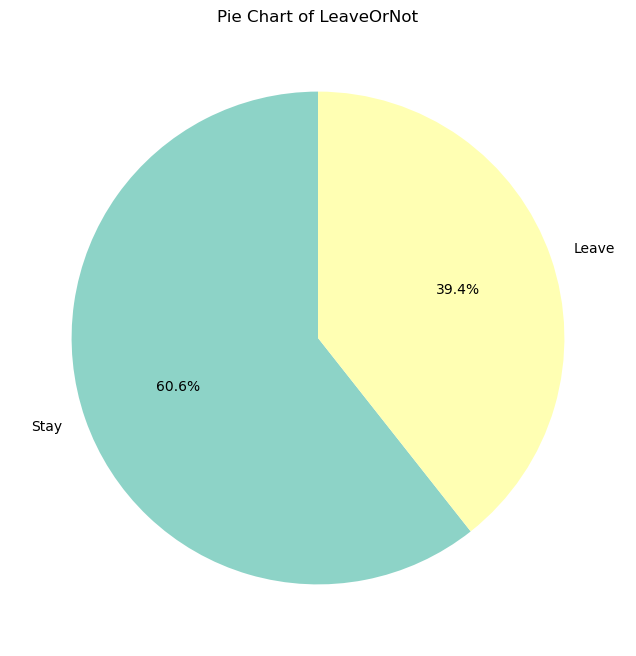

In [195]:
categorical_plot(df,'LeaveOrNot',"piechart")

## Bivariate Analysis

In [88]:
def bivariate_analysis(df, col1, col2, plot_type):
    plt.figure(figsize=(8, 6))

    if plot_type == 'bar' and df[col1].dtype == 'object' and df[col2].dtype != 'object':
        sns.barplot(x=df[col1], y=df[col2], errorbar=None)
        plt.title(f'Bar Plot: {col1} vs {col2}')
        plt.xlabel(col1)
        plt.ylabel(col2)

    elif plot_type == 'box' and df[col1].dtype == 'object' and df[col2].dtype != 'object':
        sns.boxplot(x=df[col1], y=df[col2])
        plt.title(f'Box Plot: {col1} vs {col2}')
        plt.xlabel(col1)
        plt.ylabel(col2)
    
    elif plot_type == 'box' and df[col1].dtype != 'object' and df[col2].dtype != 'object':
        sns.boxplot(x=df[col1], y=df[col2])
        plt.title(f'Box Plot: {col1} vs {col2}')
        plt.xlabel(col1)
        plt.ylabel(col2)

    elif plot_type == 'count' and df[col1].dtype == 'object' and df[col2].dtype == 'object':
        sns.countplot(x=df[col1], hue=df[col2])
        plt.title(f'Count Plot: {col1} vs {col2}')
        plt.xlabel(col1)
        plt.ylabel('Count')
    
    elif plot_type == 'count' and df[col1].dtype != 'object' and df[col2].dtype == 'object':
        sns.countplot(x=df[col1], hue=df[col2])
        plt.title(f'Count Plot: {col1} vs {col2}')
        plt.xlabel(col1)
        plt.ylabel('Count')

    elif plot_type == 'heatmap' and df[col1].dtype == 'object' and df[col2].dtype == 'object':
        crosstab = pd.crosstab(df[col1], df[col2])
        sns.heatmap(crosstab, annot=True, cmap='Blues', fmt='d')
        plt.title(f'Heatmap: {col1} vs {col2}')

    else:
        print("Error: Invalid plot type or mismatched variable types.")
        return

    plt.tight_layout()
    plt.show()


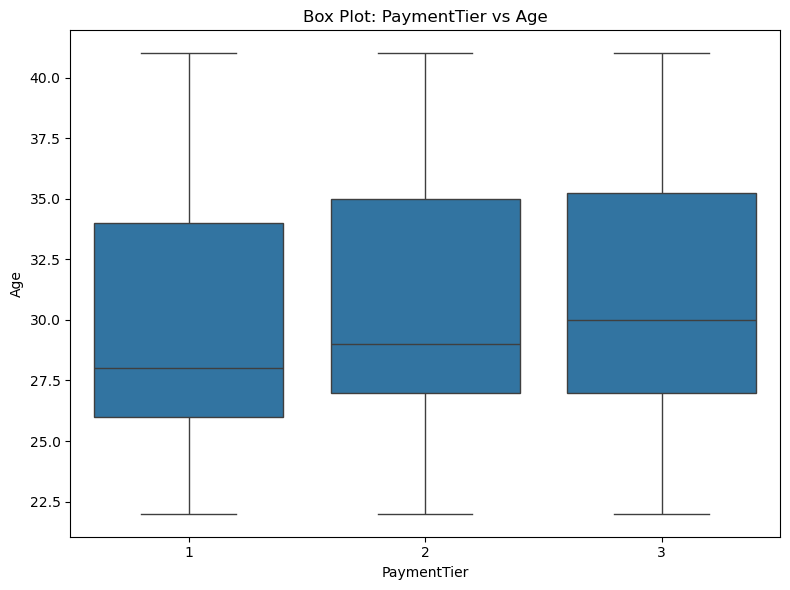

In [55]:
bivariate_analysis(df,"PaymentTier", "Age", "box")

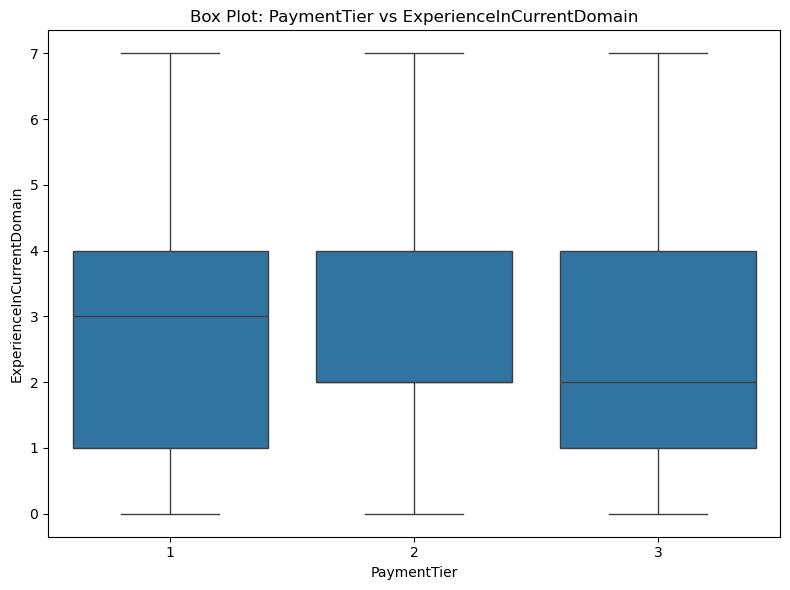

In [57]:
bivariate_analysis(df,"PaymentTier", "ExperienceInCurrentDomain", "box")

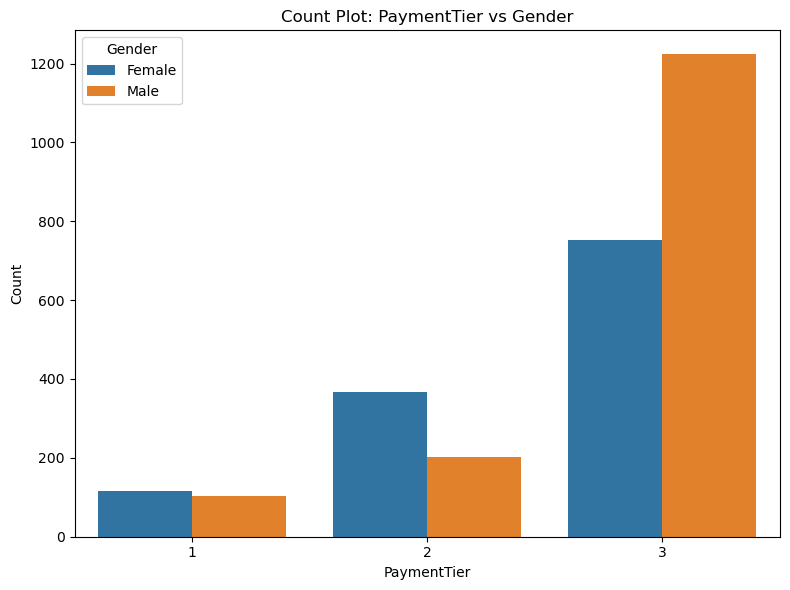

In [90]:
bivariate_analysis(df, "PaymentTier", "Gender", "count")

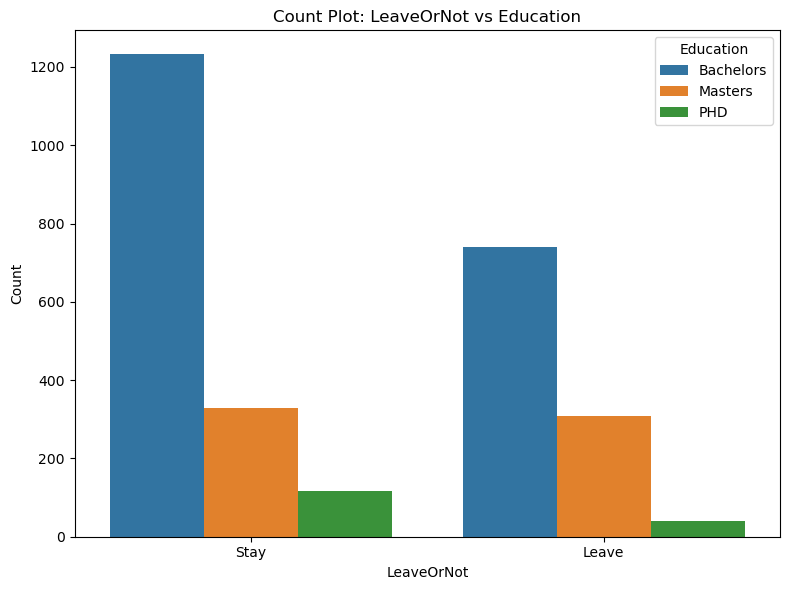

In [175]:
bivariate_analysis(df,"LeaveOrNot", "Education", "count")

Education level appears to play a crucial role in retention, with higher educational qualifications potentially leading to greater job commitment.

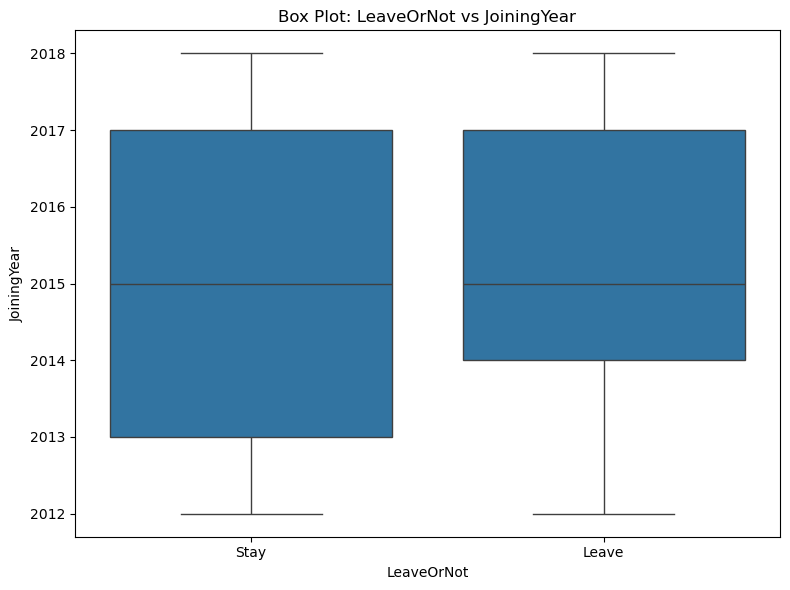

In [178]:
bivariate_analysis(df,"LeaveOrNot", "JoiningYear", "box")

The year of joining is an important feature, as it may reflect the effectiveness of retention strategies and employee experiences over time.

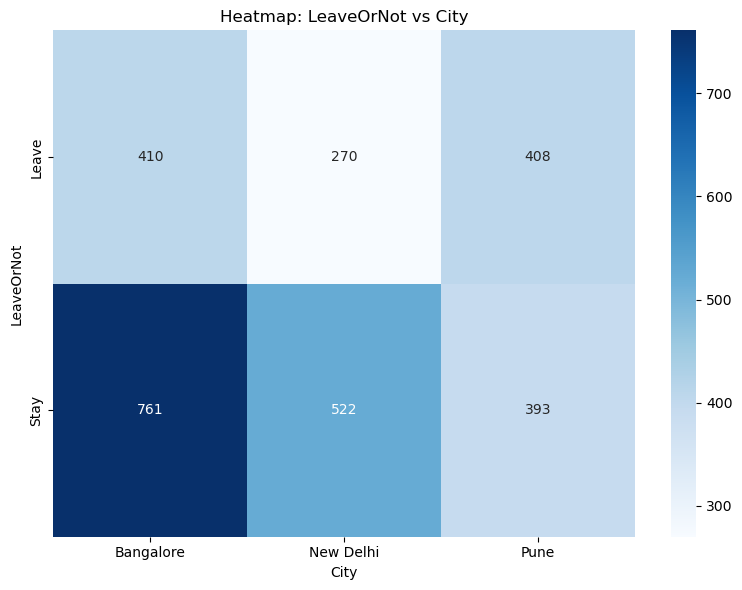

In [181]:
bivariate_analysis(df,"LeaveOrNot", "City", "heatmap")

City location appears to influence retention rates, with Bangalore having the highest retention. This could point to factors such as cost of living,
job opportunities, or local job market conditions.

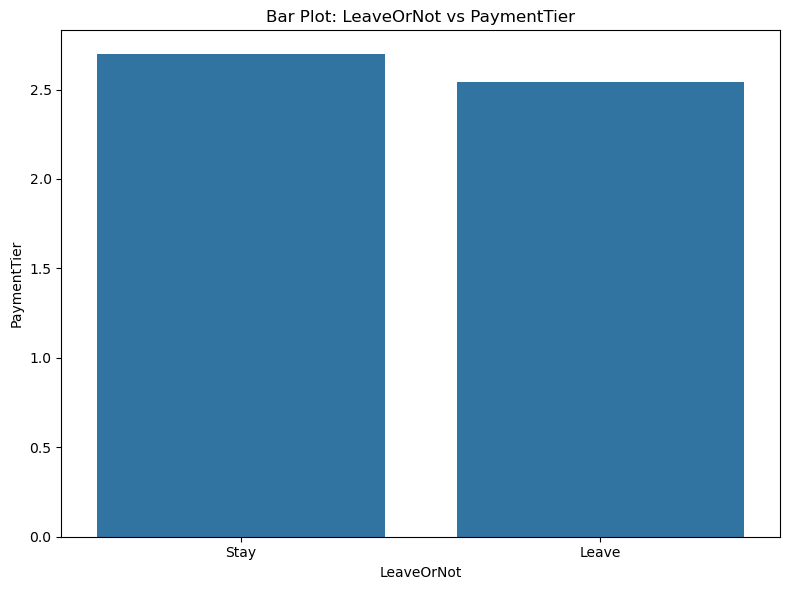

In [185]:
bivariate_analysis(df,"LeaveOrNot", "PaymentTier","bar")

The data indicates that payment tier may not be a strong predictor of employee retention, suggesting that other aspects,
such as work environment or career growth opportunities, might be more critical.

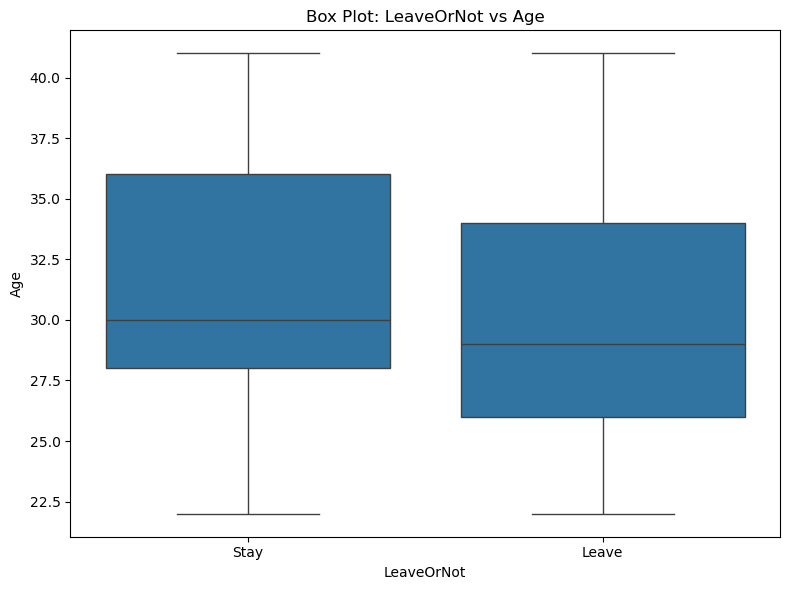

In [188]:
bivariate_analysis(df,"LeaveOrNot", "Age", "box")

Age does not seem to be a significant differentiator for retention, as both groups have overlapping age ranges. However, 
the slightly wider range for leavers may suggest that younger employees are more likely to leave, which could imply a need for 
targeted engagement strategies for different age groups.

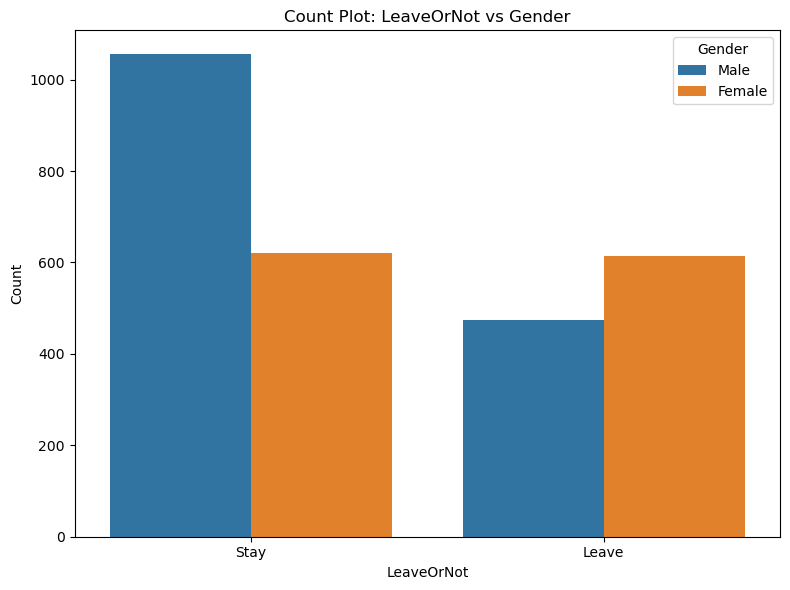

In [191]:
bivariate_analysis(df,"LeaveOrNot", "Gender", "count")

Both genders show a tendency to stay, but the retention rate appears higher among males. The difference in the number of leavers 
between genders is relatively small, suggesting that gender may not be a major factor influencing the decision to leave.

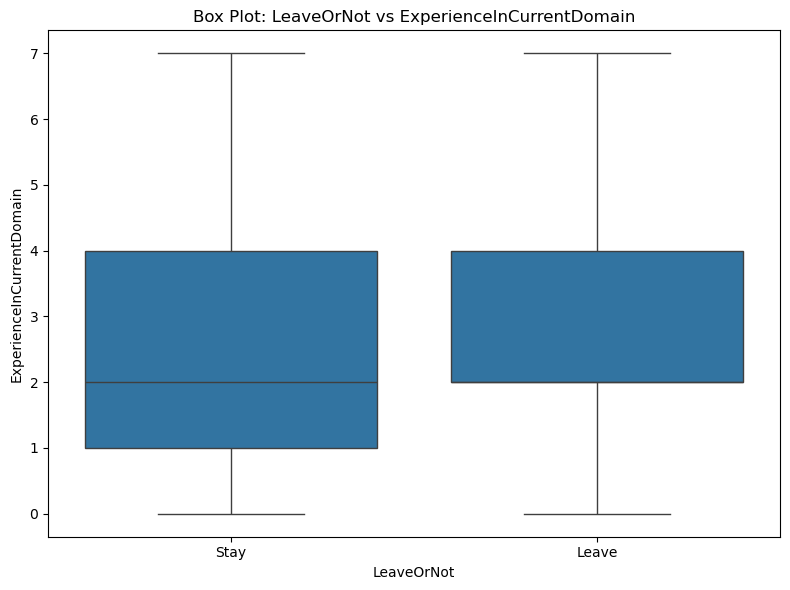

In [196]:
bivariate_analysis(df,"LeaveOrNot", "ExperienceInCurrentDomain", "box")

The data suggests that employees with greater experience in their current domain are more likely to stay with the company.
The lower experience levels among leavers may indicate a trend where less experienced employees are more likely to seek new opportunities, 
potentially for reasons such as career growth or dissatisfaction.

**Correlation Heatmap (Pearson correlation coefficient for all numerical columns)**

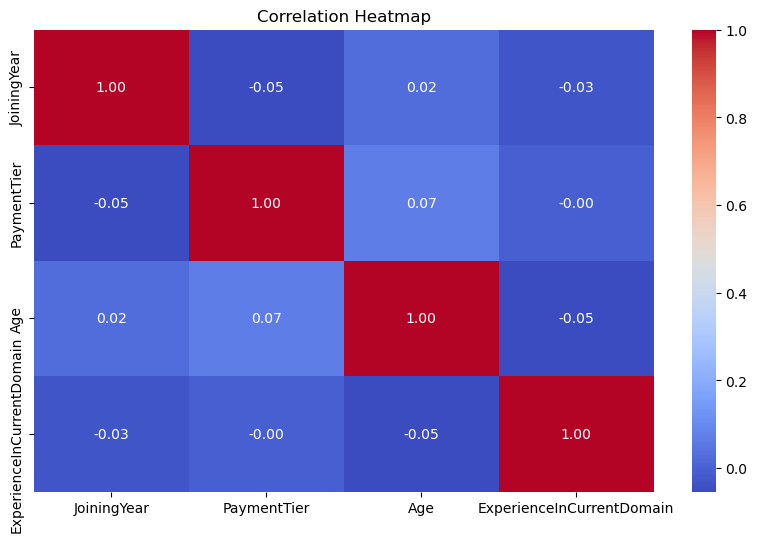

In [96]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)  # Calculate correlation for numerical columns only
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Preprocessing

### Discretizing Age based on Domian Knowledge

In [67]:
df['Age'] = np.where((df['Age'] <20) ,'Teenager',
                                np.where((df['Age'] >=20) & (df['Age'] <=30),'Adult',
                               np.where((df['Age']>30) & (df['Age'] <=50),'Middle Aged',
                                       'old')))

In [69]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,Middle Aged,Male,No,low,0
1,Bachelors,2013,Pune,1,Adult,Female,No,low_median,1
2,Bachelors,2014,New Delhi,3,Middle Aged,Female,No,low,0
3,Masters,2016,Bangalore,3,Adult,Male,No,high,1
4,Masters,2017,Pune,3,Adult,Male,Yes,low,1


### Discretizing ExperienceInCurrentDomain based on data distribution 

In [55]:
Q1=df['ExperienceInCurrentDomain'].quantile(0.25)
Q2=df['ExperienceInCurrentDomain'].quantile(0.50)
Q3=df['ExperienceInCurrentDomain'].quantile(0.75)
IQR=Q3-Q1
uw=Q3+1.5*IQR
lw=Q1-1.5*IQR

In [57]:
column='ExperienceInCurrentDomain'
df[column]  = np.where((df[column]<lw) ,'lower_outlier',
                               np.where((df[column] >=lw) & (df[column] <=Q1),'low',
                               np.where((df[column]>Q1) & (df[column] <=Q2),'low_median',
                               np.where((df[column]>Q2) & (df[column] <=Q3),'high_median',
                               np.where((df[column]>Q3) & (df[column] <=Q3+1.5*IQR),'high',
                               'upper_outlier')))))

In [86]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,Middle Aged,Male,No,low,Stay
1,Bachelors,2013,Pune,1,Adult,Female,No,low_median,Leave
2,Bachelors,2014,New Delhi,3,Middle Aged,Female,No,low,Stay
3,Masters,2016,Bangalore,3,Adult,Male,No,high,Leave
4,Masters,2017,Pune,3,Adult,Male,Yes,low,Leave


## Apply Normalization to all remaining numeric attributes


In [78]:
# function to split data into numerical and categorical columns
def data_splitter(data):
    num_columns=[]
    cat_columns=[]
    for col in data.columns:
        if data[col].dtype=='int64' or data[col].dtype=='float64':
            num_columns.append(col)
        else:
            cat_columns.append(col)
    num_data = data[num_columns]
    cat_data = data[cat_columns]
    
    return num_data,cat_data

In [88]:
numerical_columns ,categorical_columns=data_splitter(df)

In [90]:
numerical_columns

,JoiningYear,PaymentTier
0,2017,3
1,2013,1
2,2014,3
3,2016,3
4,2017,3
...,...,...
4648,2013,3
4649,2013,2
4650,2018,3
4651,2012,3


### Applying MinMax Normalization to Numerical Columns

In [93]:
from sklearn.preprocessing import MinMaxScaler  
scaler=MinMaxScaler()                            
num_norm = scaler.fit_transform(numerical_columns).round(2)

In [95]:
num_norm

array([[0.83, 1.  ],
       [0.17, 0.  ],
       [0.33, 1.  ],
       ...,
       [1.  , 1.  ],
       [0.  , 1.  ],
       [0.5 , 1.  ]])

In [97]:
data_num_norm=pd.DataFrame(num_norm, columns=numerical_columns.columns) # normalized columns are converted into dataframe
data_num_norm

,JoiningYear,PaymentTier
0,0.83,1.0
1,0.17,0.0
2,0.33,1.0
3,0.67,1.0
4,0.83,1.0
...,...,...
4648,0.17,1.0
4649,0.17,0.5
4650,1.00,1.0
4651,0.00,1.0


In [105]:
# Concatenating numerical and categorical columns
df= pd.concat([data_num_norm, categorical_columns], axis=1)
df

,JoiningYear,PaymentTier,Education,City,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0.83,1.0,Bachelors,Bangalore,Middle Aged,Male,No,low,Stay
1,0.17,0.0,Bachelors,Pune,Adult,Female,No,low_median,Leave
2,0.33,1.0,Bachelors,New Delhi,Middle Aged,Female,No,low,Stay
3,0.67,1.0,Masters,Bangalore,Adult,Male,No,high,Leave
4,0.83,1.0,Masters,Pune,Adult,Male,Yes,low,Leave
...,...,...,...,...,...,...,...,...,...
4648,0.17,1.0,Bachelors,Bangalore,Adult,Female,No,high_median,Stay
4649,0.17,0.5,Masters,Pune,Middle Aged,Male,No,low,Leave
4650,1.00,1.0,Masters,New Delhi,Adult,Male,No,high,Leave
4651,0.00,1.0,Bachelors,Bangalore,Adult,Male,Yes,low,Stay


## Appling one-hot encoding to all the categorical attributes

In [116]:
#discretizing class columns
df['LeaveOrNot'] = data['LeaveOrNot'].replace(['Stay','Leave'], [1, 0])
df

C:\Users\basit\AppData\Local\Temp\ipykernel_2144\2169296085.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['LeaveOrNot'] = data['LeaveOrNot'].replace(['Stay','Leave'], [1, 0])


,JoiningYear,PaymentTier,Education,City,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0.83,1.0,Bachelors,Bangalore,Middle Aged,Male,No,low,1
1,0.17,0.0,Bachelors,Pune,Adult,Female,No,low_median,0
2,0.33,1.0,Bachelors,New Delhi,Middle Aged,Female,No,low,1
3,0.67,1.0,Masters,Bangalore,Adult,Male,No,high,0
4,0.83,1.0,Masters,Pune,Adult,Male,Yes,low,0
...,...,...,...,...,...,...,...,...,...
4648,0.17,1.0,Bachelors,Bangalore,Adult,Female,No,high_median,1
4649,0.17,0.5,Masters,Pune,Middle Aged,Male,No,low,0
4650,1.00,1.0,Masters,New Delhi,Adult,Male,No,high,0
4651,0.00,1.0,Bachelors,Bangalore,Adult,Male,Yes,low,1


In [118]:
df_dummies = pd.get_dummies(df, dtype = 'int')     # categorical data is being converted into dummy 
df_dummies.head()  

,JoiningYear,PaymentTier,LeaveOrNot,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune,Age_Adult,Age_Middle Aged,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes,ExperienceInCurrentDomain_high,ExperienceInCurrentDomain_high_median,ExperienceInCurrentDomain_low,ExperienceInCurrentDomain_low_median
0,0.83,1.0,1,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0
1,0.17,0.0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1
2,0.33,1.0,1,1,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0
3,0.67,1.0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0
4,0.83,1.0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0


In [120]:
list(df_dummies.columns)

['JoiningYear',
 'PaymentTier',
 'LeaveOrNot',
 'Education_Bachelors',
 'Education_Masters',
 'Education_PHD',
 'City_Bangalore',
 'City_New Delhi',
 'City_Pune',
 'Age_Adult',
 'Age_Middle Aged',
 'Gender_Female',
 'Gender_Male',
 'EverBenched_No',
 'EverBenched_Yes',
 'ExperienceInCurrentDomain_high',
 'ExperienceInCurrentDomain_high_median',
 'ExperienceInCurrentDomain_low',
 'ExperienceInCurrentDomain_low_median']

In [128]:
#changing order of columns
new_order = ['JoiningYear',
 'PaymentTier',
 'Education_Bachelors',
 'Education_Masters',
 'Education_PHD',
 'City_Bangalore',
 'City_New Delhi',
 'City_Pune',
 'Age_Adult',
 'Age_Middle Aged',
 'Gender_Female',
 'Gender_Male',
 'EverBenched_No',
 'EverBenched_Yes',
 'ExperienceInCurrentDomain_high',
 'ExperienceInCurrentDomain_high_median',
 'ExperienceInCurrentDomain_low',
 'ExperienceInCurrentDomain_low_median',
 'LeaveOrNot']

df_dummies.reindex(columns=new_order)

,JoiningYear,PaymentTier,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune,Age_Adult,Age_Middle Aged,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes,ExperienceInCurrentDomain_high,ExperienceInCurrentDomain_high_median,ExperienceInCurrentDomain_low,ExperienceInCurrentDomain_low_median,LeaveOrNot
0,0.83,1.0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,1
1,0.17,0.0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0
2,0.33,1.0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,1
3,0.67,1.0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0
4,0.83,1.0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4648,0.17,1.0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1
4649,0.17,0.5,0,1,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0
4650,1.00,1.0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0
4651,0.00,1.0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1


## Split the data set into train and test set in 70:30

In [131]:
y = df_dummies['LeaveOrNot'].values
x = df_dummies.drop(columns = ['LeaveOrNot'])

In [133]:
y

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [135]:
x

,JoiningYear,PaymentTier,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune,Age_Adult,Age_Middle Aged,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes,ExperienceInCurrentDomain_high,ExperienceInCurrentDomain_high_median,ExperienceInCurrentDomain_low,ExperienceInCurrentDomain_low_median
0,0.83,1.0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0
1,0.17,0.0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1
2,0.33,1.0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0
3,0.67,1.0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0
4,0.83,1.0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4648,0.17,1.0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0
4649,0.17,0.5,0,1,0,0,0,1,0,1,0,1,1,0,0,0,1,0
4650,1.00,1.0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0
4651,0.00,1.0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0


In [137]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [139]:
x_train

,JoiningYear,PaymentTier,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune,Age_Adult,Age_Middle Aged,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes,ExperienceInCurrentDomain_high,ExperienceInCurrentDomain_high_median,ExperienceInCurrentDomain_low,ExperienceInCurrentDomain_low_median
1896,0.50,1.0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0
4027,0.83,1.0,1,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0
4445,0.67,1.0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0
3025,1.00,1.0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1
3953,0.17,0.0,1,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4079,0.33,1.0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0
4171,0.83,0.5,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0
599,0.67,1.0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0
1361,1.00,1.0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0


In [141]:
y_train

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)